# NumPy: Numerical Arrays for Python

**Learning Objectives:** Learn how to create, transform and visualize multidimensional data of a single type using Numpy. 

NumPy is the foundation for scientific computing and data science in Python. Its more data object is a multidimensional array with the following characteristics:

* Any number of dimensions
* All elements of an array have the same data type
* Array elements are usually native data dtype
* The memory for an array is a contiguous block that can be easily passed to other numerical libraries (BLAS, LAPACK, etc.).
* Most of NumPy is implemented in C, so it is fast.

## Plotting

While this notebook doesn't focus on plotting, Matplotlib will be used to make a few basic plots.

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

The `vizarray` package will be used to visualize NumPy arrays:

In [7]:
import antipackage
from github.ellisonbg.misc import vizarray as va

## Multidimensional array type

This is the canonical way you should import Numpy:

In [8]:
import numpy as np

In [9]:
data = [0,2,4,6]
a = np.array(data)

In [10]:
type(a)

numpy.ndarray

In [11]:
a

,,,


The `vz.vizarray` function can be used to visualize a 1d or 2d NumPy array using a colormap:

In [12]:
va.vizarray(a)

,,,


The shape of the array:

In [13]:
a.shape

(4,)

The number of array dimensions:

In [14]:
a.ndim

1

The number of array elements:

In [15]:
a.size

4

The number of bytes the array takes up:

In [16]:
a.nbytes

32

The `dtype` attribute describes the "data type" of the elements:

In [17]:
a.dtype

dtype('int64')

## Creating arrays

Arrays can be created with nested lists or tuples:

In [18]:
data = [[0.0,2.0,4.0,6.0],[1.0,3.0,5.0,7.0]]
b = np.array(data)

In [19]:
b

,,,
,,,


In [20]:
va.vizarray(b)

,,,
,,,


In [21]:
b.shape, b.ndim, b.size, b.nbytes

((2, 4), 2, 8, 64)

The `arange` function is similar to Python's builtin `range` function, but creates an array:

In [22]:
c = np.arange(0.0, 10.0, 1.0) # Step size of 1.0
c

,,,,,,,,,


The `linspace` function is similar, but allows you to specify the number of points:

In [23]:
e = np.linspace(0.0, 5.0, 11) # 11 points
e

,,,,,,,,,,


There are also `empty`, `zeros` and `ones` functions:

In [24]:
np.empty((4,4))

,,,
,,,
,,,
,,,


In [25]:
np.zeros((3,3))

,,
,,
,,


In [26]:
np.ones((3,3))

,,
,,
,,


See also:

* `empty_like`, `ones_like`, `zeros_like`
* `eye`, `identity`, `diag`

## dtype

Arrays have a `dtype` attribute that encapsulates the "data type" of each element. It can be set:

* Implicitely by the element type
* By passing the `dtype` argument to an array creation function

Here is an integer valued array:

In [27]:
a = np.array([0,1,2,3])

In [28]:
a, a.dtype

(array([0, 1, 2, 3]), dtype('int64'))

All array creation functions accept an optional `dtype` argument:

In [29]:
b = np.zeros((2,2), dtype=np.complex64)
b

/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:3017: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))


,
,


In [30]:
c = np.arange(0, 10, 2, dtype=np.float)
c

,,,,


You can use the `astype` method to create a copy of the array with a given `dtype`:

In [31]:
d = c.astype(dtype=np.int)
d

,,,,


IPython's tab completion is useful for exploring the various available `dtypes`:

In [32]:
np.float*?

The NumPy documentation on [dtypes](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) describes the many other ways of specifying dtypes.

## Array operations

Basic mathematical operations are **elementwise** for:

* Scalars and arrays
* Arrays and arrays

Fill an array with a value:

In [33]:
a = np.empty((3,3))
a.fill(0.1)
a

,,
,,
,,


In [34]:
b = np.ones((3,3))
b

,,
,,
,,


Addition is elementwise:

In [35]:
a+b

,,
,,
,,


Division is elementwise:

In [36]:
b/a

,,
,,
,,


As are powers:

In [37]:
a**2

,,
,,
,,


Scalar multiplication is also elementwise:

In [38]:
np.pi*b

,,
,,
,,


## Indexing and slicing

Indexing and slicing provide an efficient way of getting the values in an array and modifying them.

In [39]:
a = np.random.rand(10,10)

The `enable` function is part of `vizarray` and enables a nice display of arrays:

In [40]:
va.enable()

In [41]:
a

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


List Python lists and tuples, NumPy arrays have zero-based indexing and use the `[]` syntax for getting and setting values:

In [42]:
a[0,0]

0.68296616256362175

An index of `-1` refers to the last element along that axis:

In [43]:
a[-1,-1] == a[9,9]

True

Extract the 0th column using the `:` syntax, which denotes all elements along that axis.

In [44]:
a[:,0]

,,,,,,,,,


The last row:

In [45]:
a[-1,:]

,,,,,,,,,


You can also slice ranges:

In [46]:
a[0:2,0:2]

,
,


Assignment also works with slices:

In [47]:
a[0:5,0:5] = 1.0

In [48]:
a

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Note how even though we assigned the value to the slice, the original array was changed. This clarifies that slices are **views** of the same data, not a copy.

In [49]:
va.disable()

### Boolean indexing

Arrays can be indexed using other arrays that have boolean values.

In [50]:
ages = np.array([23,56,67,89,23,56,27,12,8,72])
genders = np.array(['m','m','f','f','m','f','m','m','m','f'])

Boolean expressions involving arrays create new arrays with a `bool` dtype and the elementwise result of the expression:

In [51]:
ages > 30

array([False,  True,  True,  True, False,  True, False, False, False,  True], dtype=bool)

In [52]:
genders == 'm'

array([ True,  True, False, False,  True, False,  True,  True,  True, False], dtype=bool)

Boolean expressions provide an extremely fast and flexible way of querying arrays:

In [53]:
(ages > 10) & (ages < 50)

array([ True, False, False, False,  True, False,  True,  True, False, False], dtype=bool)

You can use a boolean array to index into the original or another array. This selects the ages of all females in the `genders` array:

In [54]:
mask = (genders == 'f')
ages[mask]

array([67, 89, 56, 72])

In [55]:
ages[ages>30]

array([56, 67, 89, 56, 72])

## Reshaping, transposing

In [56]:
va.enable()

In [57]:
a = np.random.rand(3,4)

In [58]:
a

,,,
,,,
,,,


The `T` atrribute contains the transpose of the original array:

In [59]:
a.T

,,
,,
,,
,,


The `reshape` method can be used to change the shape and even the number of dimensions:

In [60]:
a.reshape(2,6)

,,,,,
,,,,,


In [61]:
a.reshape(6,2)

,
,
,
,
,
,


The `ravel` method strings the array out in one dimension:

In [62]:
a.ravel()

,,,,,,,,,,,


In [63]:
va.disable()

## Universal functions

Universal function, or "ufuncs," are functions that take and return arrays or scalars. They have the following characteristics:

* Vectorized C implementations, much faster than hand written loops in Python
* Allow for concise Pythonic code
* Here is a complete list of the [available NumPy ufuncs](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs) lists the available ufuncs.

In [64]:
va.set_block_size(10)
va.enable()

Here is a linear sequence of values"

In [65]:
t = np.linspace(0.0, 4*np.pi, 100)
t

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Take the $sin$ of each element of the array:

In [66]:
np.sin(t)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


As the next two examples show, multiple ufuncs can be used to create complex mathematical expressions that can be computed efficiently:

In [67]:
np.exp(np.sqrt(t))

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [68]:
va.disable()
va.set_block_size(30)

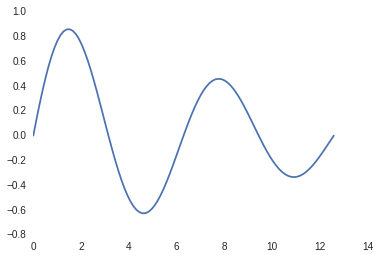

In [69]:
plt.plot(t, np.exp(-0.1*t)*np.sin(t))

In general, you should always try to use ufuncs rather than do computations using for loops. These types of array based computations are referred to as *vectorized*.

## Basic data processing

In [70]:
ages = np.array([23,56,67,89,23,56,27,12,8,72])
genders = np.array(['m','m','f','f','m','f','m','m','m','f'])

Numpy has a basic set of methods and function for computing basic quantities about data.

In [71]:
ages.min(), ages.max()

(8, 89)

Compute the mean:

In [72]:
ages.mean()

43.299999999999997

Compute the variance and standard deviation:

In [73]:
ages.var(), ages.std()

(711.21000000000004, 26.668520768876554)

The `bincount` function counts how many times each value occurs in the array:

In [74]:
np.bincount(ages)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

The `cumsum` and `cumprod` methods compute cumulative sums and products:

In [75]:
ages.cumsum()

array([ 23,  79, 146, 235, 258, 314, 341, 353, 361, 433])

In [76]:
ages.cumprod()

array([              23,             1288,            86296,
                7680344,        176647912,       9892283072,
           267091642944,    3205099715328,   25640797722624,
       1846137436028928])

Most of the functions and methods above take an `axis` argument that will apply the action along a particular axis:

In [77]:
a = np.random.randint(0,10,(3,4))
a

array([[6, 5, 3, 7],
       [9, 0, 3, 1],
       [9, 1, 5, 5]])

With `axis=0` the action takes place along rows:

In [78]:
a.sum(axis=0)

array([24,  6, 11, 13])

With `axis=1` the action takes place along columns:

In [79]:
a.sum(axis=1)

array([21, 13, 20])

The `unique` function is extremely useful in working with categorical data:

In [80]:
np.unique(genders)

array(['f', 'm'], 
      dtype='|S1')

In [81]:
np.unique(genders, return_counts=True)

(array(['f', 'm'], 
       dtype='|S1'), array([4, 6]))

The where function allows you to apply conditional logic to arrays. Here is a rough sketch of how it works:

```python
def where(condition, if_false, if_true):
```

In [82]:
np.where(ages>30, 0, 1)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

The `if_false` and `if_true` values can be arrays themselves:

In [83]:
np.where(ages<30, 0, ages)

array([ 0, 56, 67, 89,  0, 56,  0,  0,  0, 72])

## File IO

NumPy has a a number of different function to reading and writing arrays to and from disk.

### Single array, binary format

In [84]:
a = np.random.rand(10)
a

array([ 0.00324567,  0.06544184,  0.11949386,  0.31734987,  0.26496348,
        0.78632495,  0.66077329,  0.87978473,  0.79349245,  0.69955513])

Save the array to a binary file named `array1.npy`:

In [85]:
np.save('array1', a)

In [86]:
ls

array1.npy  array2.txt  arrays.npz  Day05.ipynb  Numpy.ipynb


Using `%pycat` to look at the file shows that it is binary:

In [87]:
%pycat array1.npy

Load the array back into memory:

In [88]:
a_copy = np.load('array1.npy')

In [89]:
a_copy

array([ 0.00324567,  0.06544184,  0.11949386,  0.31734987,  0.26496348,
        0.78632495,  0.66077329,  0.87978473,  0.79349245,  0.69955513])

### Single array, text format

In [90]:
b = np.random.randint(0,10,(5,3))
b

array([[4, 7, 3],
       [5, 0, 0],
       [6, 3, 2],
       [4, 2, 8],
       [1, 6, 0]])

The `savetxt` function saves arrays in a simple, textual format that is less effecient, but easier for other languges to read:

In [91]:
np.savetxt('array2.txt', b)

In [92]:
ls

array1.npy  array2.txt  arrays.npz  Day05.ipynb  Numpy.ipynb


Using `%pycat` to look at the contents shows that the files is indeed a plain text file:

In [93]:
%pycat array2.txt

In [94]:
np.loadtxt('array2.txt')

array([[ 4.,  7.,  3.],
       [ 5.,  0.,  0.],
       [ 6.,  3.,  2.],
       [ 4.,  2.,  8.],
       [ 1.,  6.,  0.]])

### Multiple arrays, binary format

The `savez` function provides an efficient way of saving multiple arrays to a single file:

In [95]:
np.savez('arrays.npz', a=a, b=b)

The `load` function returns a dictionary like object that provides access to the individual arrays:

In [96]:
a_and_b = np.load('arrays.npz')

In [97]:
a_and_b['a']

array([ 0.00324567,  0.06544184,  0.11949386,  0.31734987,  0.26496348,
        0.78632495,  0.66077329,  0.87978473,  0.79349245,  0.69955513])

In [98]:
a_and_b['b']

array([[4, 7, 3],
       [5, 0, 0],
       [6, 3, 2],
       [4, 2, 8],
       [1, 6, 0]])

## Linear algebra

NumPy has excellent linear algebra capabilities.

In [99]:
a = np.random.rand(5,5)
b = np.random.rand(5,5)

Remember that array operations are elementwise. Thus, this is **not** matrix multiplication:

In [100]:
a*b

array([[ 0.02830077,  0.25906515,  0.12398166,  0.07917063,  0.08407031],
       [ 0.02227573,  0.20124394,  0.03274117,  0.8035577 ,  0.34945515],
       [ 0.56254468,  0.07260351,  0.3617869 ,  0.00807774,  0.25325744],
       [ 0.39437033,  0.07231078,  0.52189506,  0.15780192,  0.2058932 ],
       [ 0.32163849,  0.13429938,  0.13755354,  0.20104125,  0.42445287]])

To get matrix multiplication use `np.dot`:

In [101]:
np.dot(a, b)

array([[ 0.78852781,  1.238266  ,  1.08373962,  1.03467467,  1.25106047],
       [ 1.13554621,  1.03417542,  1.38551702,  0.87144888,  1.45634675],
       [ 1.1456636 ,  0.86562897,  1.19168286,  0.60334798,  1.21349657],
       [ 1.57526869,  1.51644572,  1.72248341,  1.20908684,  1.92148456],
       [ 1.1694862 ,  1.08700847,  1.36363429,  0.94552522,  1.34558034]])

Or, NumPy as a `matrix` subclass for which matrix operations are the default:

In [102]:
m1 = np.matrix(a)
m2 = np.matrix(b)

In [103]:
m1*m2

matrix([[ 0.78852781,  1.238266  ,  1.08373962,  1.03467467,  1.25106047],
        [ 1.13554621,  1.03417542,  1.38551702,  0.87144888,  1.45634675],
        [ 1.1456636 ,  0.86562897,  1.19168286,  0.60334798,  1.21349657],
        [ 1.57526869,  1.51644572,  1.72248341,  1.20908684,  1.92148456],
        [ 1.1694862 ,  1.08700847,  1.36363429,  0.94552522,  1.34558034]])

The `np.linalg` package has a wide range of fast linear algebra operations.

Here is determinant:

In [ ]:
np.linalg.det(a)

0.052482133184051559

Matrix inverse:

In [ ]:
np.linalg.inv(a)

array([[-0.39440082, -1.11767576, -1.16886681,  0.55282405,  1.9672159 ],
       [-1.25566429, -0.46621917, -4.88576675,  2.85503787,  2.31205674],
       [ 2.82653919, -0.16025282,  6.07772285, -2.82025345, -3.20442068],
       [-2.12451599,  0.98678073, -1.77161016,  1.98190062,  0.21619482],
       [ 2.26525201,  0.80702971,  3.15440274, -2.8452499 , -1.2786343 ]])

Eigenvalues:

In [ ]:
np.linalg.eigvals(a)

array([ 2.52565150+0.j        , -0.40048878+0.34316148j,
       -0.40048878-0.34316148j,  0.15952077+0.j        ,  0.46831719+0.j        ])

NumPy can be built against fast BLAS/LAPACK implementation for these linear algebra operations.

In [ ]:
c = np.random.rand(2000,2000)

In [ ]:
%timeit -n1 -r1 evs = np.linalg.eigvals(c)

## Random numbers

NumPy has functions for creating arrays of random numbers from different distributions in `np.random`, as well as handling things like permutation, shuffling, and choosing.

Here is the [numpy.random documentation](http://docs.scipy.org/doc/numpy/reference/routines.random.html).

In [ ]:
plt.hist(np.random.random(250))
plt.title('Uniform Random Distribution $[0,1]$')
plt.xlabel('value')
plt.ylabel('count')

In [ ]:
plt.hist(np.random.randn(250))
plt.title('Standard Normal Distribution')
plt.xlabel('value')
plt.ylabel('count')

The `shuffle` function shuffles an array in place:

In [ ]:
a = np.arange(0,10)
np.random.shuffle(a)
a

The `permutation` function does the same thing but first makes a copy:

In [ ]:
a = np.arange(0,10)
print(np.random.permutation(a))
print(a)

The `choice` function provides a powerful way of creating synthetic data sets of discrete data:

In [ ]:
np.random.choice(['m','f'], 20, p=[0.25,0.75])

## Resources

* [NumPy Reference Documentation](http://docs.scipy.org/doc/numpy/reference/)
* [Python Scientific Lecture Notes](http://scipy-lectures.github.io/index.html), Edited by Valentin Haenel,
Emmanuelle Gouillart and Gaël Varoquaux.
* [Lectures on Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures), J.R. Johansson.
* [Introduction to Scientific Computing in Python](http://nbviewer.ipython.org/github/jakevdp/2014_fall_ASTR599/tree/master/), Jake Vanderplas.